# Combined DNA Type Breakdown (ENSEMBL, 1K, NCBI)

[ENSEMBLE, NCBI, 1k, FUNGIDB]
('chrom:', [0, 0, 0, 0])
('contig:', [0, 0, 0, 0])
('chrom_and_contig', [0, 3.22, 5.935, 0])


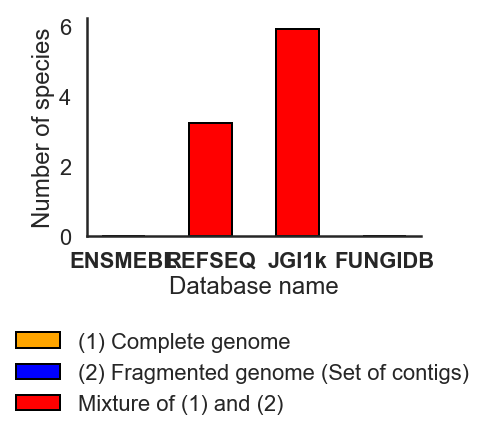

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc
import pandas as pd
import sqlite3
 
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ensembl_total = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE'", cnx).size
ensembl_chr = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE' AND chromosome_count > 0 AND contig_count == 0", cnx).size / ensembl_total)*100
ensembl_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE' AND chromosome_count == 0 AND contig_count >0", cnx).size / ensembl_total)*100
ensembl_chrom_and_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE' AND chromosome_count > 0 AND contig_count > 0", cnx).size / ensembl_total)*100

ncbi_total = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI'", cnx).size
ncbi_chr = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI' AND chromosome_count > 0 AND contig_count == 0", cnx).size / ncbi_total)*100
ncbi_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI' AND chromosome_count == 0 AND contig_count >0", cnx).size / ncbi_total)*100
ncbi_chrom_and_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI' AND chromosome_count > 0 AND contig_count > 0", cnx).size / ncbi_total)*100


onek_total = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K'", cnx).size
onek_chr = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K' AND chromosome_count > 0 AND contig_count == 0", cnx).size / onek_total)*100
onek_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K' AND chromosome_count == 0 AND contig_count >0", cnx).size / onek_total)*100
onek_chrom_and_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K' AND chromosome_count > 0 AND contig_count > 0", cnx).size / onek_total)*100

fungidb_total = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'FUNGIDB'", cnx).size
fungidb_chr = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'FUNGIDB' AND chromosome_count > 0 AND contig_count == 0", cnx).size / fungidb_total)*100
fungidb_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'FUNGIDB' AND chromosome_count == 0 AND contig_count >0", cnx).size / fungidb_total)*100
fungidb_chrom_and_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'FUNGIDB' AND chromosome_count > 0 AND contig_count > 0", cnx).size / fungidb_total)*100


# [ENSEMBLE, NCBI, 1k]
chrom = [ensembl_chr, ncbi_chr, onek_chr, fungidb_chr]
contig = [ensembl_contig, ncbi_contig, onek_contig, fungidb_contig]
chrom_and_contig = [ensembl_chrom_and_contig ,ncbi_chrom_and_contig + 3.22, onek_chrom_and_contig+ 5.935, fungidb_chrom_and_contig]


print("[ENSEMBLE, NCBI, 1k, FUNGIDB]")
print("chrom:", chrom) 
print("contig:", contig) 
print("chrom_and_contig", chrom_and_contig)

# Heights of chrom + contig
bars = [ensembl_chr + ensembl_contig, ncbi_chr + ncbi_contig, onek_chr + onek_contig, fungidb_chr + fungidb_contig]

# Heights of chrom + contig + mixture
# bars2 = [bars[0] + ensembl_chrom_and_contig , bars[1] +ncbi_chrom_and_contig, bars[2] + onek_chrom_and_contig]

# The position of the bars on the x-axis
r = [0,2,4,6]

# Names of group and bar width
names = ['ENSMEBL','REFSEQ','JGI1k','FUNGIDB']
barWidth = 1

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")

# Create orange bars default bar on bottom for chromosomes
p1 = plt.bar(r, chrom, color='orange', edgecolor='black', width=barWidth)
# Create blue bars (middle), on top of the firs ones for contigs
p2 = plt.bar(r, contig, bottom=chrom, color='blue', edgecolor='black', width=barWidth)
# Create red bars (second from top)
p3 = plt.bar(r, chrom_and_contig, bottom=bars, color='red', edgecolor='black', width=barWidth)


# create green bars (top) containing plasmid sequences
# p4 = plt.bar(r, other, bottom=bars2, color='green', edgecolor='black', width=barWidth)


# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Database name")

# Custom Y axis
plt.ylabel("Number of species")

#  legend
plt.legend((p1[0], p2[0], p3[0]), ('(1) Complete genome', '(2) Fragmented genome (Set of contigs)', 'Mixture of (1) and (2)'), bbox_to_anchor=(1.2, -0.35),frameon=False)




g=sns.despine()
# plt.savefig("contigs.vs.chr.pdf", bbox_inches='tight')

# Mitochondria Composition

('ensembl_species', 811)
277
1060
134
('ensembl_mt_species', 158)
('NCBI_mt_species', 47)
('OneK_mt_species', 0)
('fungidb_mt_species', 53)
[ENSEMBLE, NCBI, 1k, FUNGIDB] percent mitochondria present
[ENSEMBLE, NCBI, 1k, FUNGIDB]
('proportion_mt', [19.482120838471022, 16.967509025270758, 0.0, 39.55223880597015])
('proportion_NO_mt', [80.51787916152898, 83.03249097472924, 100.0, 60.44776119402985])


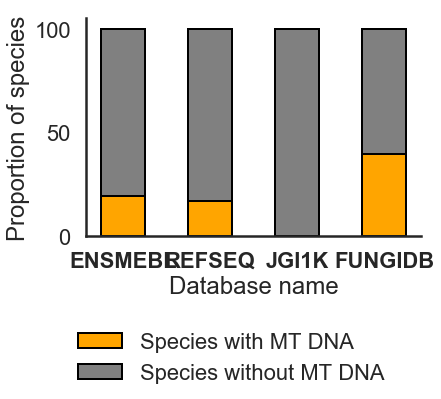

In [18]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc
import pandas as pd
import seaborn as sns


cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')


ensembl_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE'", cnx).size
NCBI_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI'", cnx).size
OneK_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K'", cnx).size
fungidb_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'FUNGIDB'", cnx).size



ensembl_mt_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE' AND mtDNA_count > 0", cnx).size
NCBI_mt_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI' AND mtDNA_count > 0", cnx).size
OneK_mt_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K' AND mtDNA_count > 0", cnx).size
fungidb_mt_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'FUNGIDB' AND mtDNA_count > 0", cnx).size



prop_ensembl_with_mt = (ensembl_mt_species / float(ensembl_species) ) * 100.0
prop_NCBI_with_mt = (NCBI_mt_species / float(NCBI_species) ) * 100.0
# prop_1K_with_mt = (OneK_mt_species / float(OneK_species) ) * 100.0
prop_1K_with_mt = 271/1063 * 100.0
prop_fungidb_with_mt = (fungidb_mt_species/ float(fungidb_species) ) * 100.0 


print("ensembl_species",ensembl_species)
print(NCBI_species)
print(OneK_species)
print(fungidb_species)

print("ensembl_mt_species",ensembl_mt_species)
print("NCBI_mt_species",NCBI_mt_species)
print("OneK_mt_species",OneK_mt_species)
print("fungidb_mt_species", fungidb_mt_species)

    # [ENSEMBLE, NCBI, 1k]
proportion_mt = [prop_ensembl_with_mt, prop_NCBI_with_mt, prop_1K_with_mt, prop_fungidb_with_mt]
proportion_no_mt = [100 - prop_ensembl_with_mt, 100 - prop_NCBI_with_mt, 100 - prop_1K_with_mt, 100 - prop_fungidb_with_mt]

print("[ENSEMBLE, NCBI, 1k, FUNGIDB] percent mitochondria present")
print("[ENSEMBLE, NCBI, 1k, FUNGIDB]")
print("proportion_mt", proportion_mt)
print("proportion_NO_mt", proportion_no_mt)


# The position of the bars on the x-axis
r = [0,2,4,6]
 
# Names of group and bar width
names = ['ENSMEBL','REFSEQ','JGI1K', "FUNGIDB"]
barWidth = 1
 

g=sns.set_style("white")
g=sns.set_context("poster")

# Create orange bars default bar on bottom for chromosomes
p1 = plt.bar(r, proportion_mt, color='orange', edgecolor='black', width=barWidth)
# Create green bars (middle), on top of the firs ones for contigs
p2 = plt.bar(r, proportion_no_mt, bottom=proportion_mt, color='grey', edgecolor='black', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Database name")

# Custom Y axis
plt.ylabel("Proportion of species")

#  legend
plt.legend((p1[0], p2[0]), ('Species with MT DNA', 'Species without MT DNA'),bbox_to_anchor=(0.95, -0.35),frameon=False)

g=sns.despine()
# plt.savefig("MT.png", bbox_inches='tight')

# Plasmid Composition 

811
277
1060
134
77
1
0
0
[ENSEMBLE, NCBI, 1k, FUNGIDB]
[9.494451294697903, 0.36101083032490977, 0.0, 0.0]


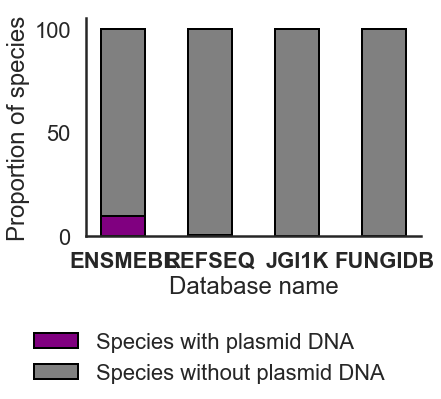

In [19]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc

cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ensembl_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE'", cnx).size
NCBI_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI'", cnx).size
OneK_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K'", cnx).size
fungidb_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'FUNGIDB'", cnx).size


ensembl_plasmid_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'ENSEMBLE' AND plasmid_count > 0", cnx).size
NCBI_plasmid_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'NCBI' AND plasmid_count > 0", cnx).size
OneK_plasmid_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = '1K' AND plasmid_count > 0", cnx).size
fungidb_plasmid_species = pd.read_sql_query("SELECT SPECIESTAXID FROM speciesdb where dbname = 'FUNGIDB' AND plasmid_count > 0", cnx).size


prop_ensembl_with_plasmid = (ensembl_plasmid_species / float(ensembl_species) ) * 100
prop_NCBI_with_plasmid = (NCBI_plasmid_species / float(NCBI_species) ) * 100
prop_1K_with_plasmid = (OneK_plasmid_species / float(OneK_species) ) * 100
prop_fungidb_with_plasmid = (fungidb_plasmid_species / float(fungidb_species) ) * 100

print(ensembl_species)
print(NCBI_species)
print(OneK_species)
print(fungidb_species)

print(ensembl_plasmid_species)
print(NCBI_plasmid_species)
print(OneK_plasmid_species)
print(fungidb_plasmid_species)


    # [ENSEMBLE, NCBI, 1k]
proportion_plasmid = [prop_ensembl_with_plasmid, prop_NCBI_with_plasmid, prop_1K_with_plasmid, prop_fungidb_with_plasmid]
proportion_no_plasmid = [100 - prop_ensembl_with_plasmid, 100 - prop_NCBI_with_plasmid, 100 - prop_1K_with_plasmid, 100 - prop_fungidb_with_plasmid ]

print("[ENSEMBLE, NCBI, 1k, FUNGIDB]")
print(proportion_plasmid)
# The position of the bars on the x-axis
r = [0,2,4,6]
 
# Names of group and bar width
names = ['ENSMEBL','REFSEQ','JGI1K', 'FUNGIDB']
barWidth = 1

g=sns.set_style("white")
g=sns.set_context("poster")

# Create orange bars default bar on bottom for plasmid dna
p1 = plt.bar(r, proportion_plasmid, color='purple', edgecolor='black', width=barWidth)
# Create green bars (middle), on top of the first ones for other
p2 = plt.bar(r, proportion_no_plasmid, bottom=proportion_plasmid, color='grey', edgecolor='black', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Database name")
 
# Custom Y axis
plt.ylabel("Proportion of species")

#  legend
plt.legend((p1[0], p2[0]), ('Species with plasmid DNA', 'Species without plasmid DNA'),bbox_to_anchor=(0.95, -0.35),frameon=False)



g=sns.despine()
# plt.savefig("plasmid.pdf", bbox_inches='tight')

In [32]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv

cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')
      
occur_once = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

occur_twice = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 2", cnx)

occur_thrice = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)

occur_quad = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 4", cnx)


# Combos of one
ENSEMBL = 0 
ONEK = 0 
NCBI = 0 
FUNGIDB = 0 


NCBI = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'NCBI'", cnx)

ONEK = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = '1K'", cnx)

ENSEMBL = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBLE'", cnx)

FUNGIDB = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'FUNGIDB'", cnx)


print(NCBI.size)
print(ONEK.size)
print(ENSEMBL.size)
print("FungiDB:")
print(FUNGIDB.size)



# combos of two
ENSEMBL_ONEK = 0 
ENSEMBL_NCBI = 0 
ONEK_NCBI = 0 
ENSEMBL_FUNGIDB = 0 
ONEK_FUNGIDB = 0 
NCBI_FUNGIDB = 0


for index, row in occur_twice.iterrows():
    SPECIEStaxid = row["SPECIESTAXID"]
    databases = pd.read_sql_query("SELECT DBNAME FROM SPECIESDB WHERE SPECIESTAXID =" + str(SPECIEStaxid), cnx)
    ENSEMBL_tmp = 0
    NCBI_tmp = 0
    ONEK_tmp = 0
    FUNGIDB_tmp = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBL_tmp = 1
        if r["DBNAME"] == "NCBI":
            NCBI_tmp = 1
        if r["DBNAME"] == "1K":
            ONEK_tmp = 1
        if r["DBNAME"] == "FUNGIDB":
            FUNGIDB_tmp = 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1:  
        ENSEMBL_ONEK += 1
    if ENSEMBL_tmp == 1 and NCBI_tmp == 1:  
        ENSEMBL_NCBI += 1
    if NCBI_tmp == 1 and ONEK_tmp == 1: 
        ONEK_NCBI += 1        
    if ENSEMBL_tmp == 1 and FUNGIDB_tmp == 1:
        ENSEMBL_FUNGIDB += 1  
    if ONEK_tmp == 1 and FUNGIDB_tmp == 1:
        ONEK_FUNGIDB += 1
    if NCBI_tmp == 1 and FUNGIDB_tmp == 1:
        NCBI_FUNGIDB += 1 

print(ENSEMBL_ONEK)
print(ENSEMBL_NCBI)
print(ONEK_NCBI)
print(ENSEMBL_FUNGIDB)
print(ONEK_FUNGIDB)
print(NCBI_FUNGIDB)


# Combos of three
ENSEMBL_ONEK_NCBI = 0 
ENSEMBL_ONEK_FUNGIDB = 0 
ENSEMBL_NCBI_FUNGIDB = 0 
ONEK_NCBI_FUNGIDB = 0

for index, row in occur_thrice.iterrows():
    SPECIEStaxid = row["SPECIESTAXID"]
    databases = pd.read_sql_query("SELECT DBNAME FROM SPECIESDB WHERE SPECIESTAXID =" + str(SPECIEStaxid), cnx)
    ENSEMBL_tmp = 0
    NCBI_tmp = 0
    ONEK_tmp = 0
    FUNGIDB_tmp = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBL_tmp = 1
        if r["DBNAME"] == "NCBI":
            NCBI_tmp = 1
        if r["DBNAME"] == "1K":
            ONEK_tmp = 1
        if r["DBNAME"] == "FUNGIDB":
            FUNGIDB_tmp = 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1 and NCBI_tmp == 1:  
        ENSEMBL_ONEK_NCBI += 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1 and FUNGIDB_tmp == 1:  
        ENSEMBL_ONEK_FUNGIDB += 1
    if ENSEMBL_tmp == 1 and NCBI_tmp == 1 and FUNGIDB_tmp == 1: 
        ENSEMBL_NCBI_FUNGIDB += 1
    if ONEK_tmp == 1 and NCBI_tmp ==1 and FUNGIDB_tmp == 1:
        ONEK_NCBI_FUNGIDB += 1

        


# combos of four
ENSEMBL_ONEK_NCBI_FUNGIDB = occur_quad.size


print(occur_once.size)
print(occur_twice.size)
print(occur_thrice.size)
print(occur_quad.size)


import matplotlib.pyplot as plt
from itertools import combinations
from simple_venn import venn2, venn3, venn4
%matplotlib inline


# Combinations
sets = 'ENSEMBL 1K NCBI FUNGIDB'.split()
subsets = [ENSEMBL.size, ONEK.size, NCBI.size, FUNGIDB.size, ENSEMBL_ONEK, ENSEMBL_NCBI, ENSEMBL_FUNGIDB, ONEK_NCBI, ONEK_FUNGIDB, NCBI_FUNGIDB, ENSEMBL_ONEK_NCBI, ENSEMBL_ONEK_FUNGIDB, ENSEMBL_NCBI_FUNGIDB, ONEK_NCBI_FUNGIDB, ENSEMBL_ONEK_NCBI_FUNGIDB]

fig, axes = plt.subplots(figsize=(24, 8))
ax = axes
out = venn4(subsets, ax=ax, set_labels = ('ENSEMBL', 'JGI1K', 'NCBI', 'FUNGIDB'), set_label_fontsize=24, subset_label_fontsize=24);

#venn3(font_size(24))

# for text in out.subset:
#     text.set_fontsize(14)
    
# ax.set_title('', fontsize=24)
# plt.savefig('SPECIES_Distribution.png', bbox_inches='tight')

16
614
158
FungiDB:
21
134
46
28
10
3
1
809
222
153
44


ImportError: No module named simple_venn

# GENUS contained in three, two and one database: PIE CHART


In [ ]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

TOTAL_NUMBER_OF_DISTINCT_GENUSES = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB", cnx)

GENUS_THAT_OCCUR_ONCE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

GENUS_THAT_OCCUR_TWICE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 2", cnx)

GENUS_THAT_OCCUR_THRICE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 3", cnx)

ENSEMBLE_NCBI = 0
ENSEMBLE_1K = 0
NCBI_1K = 0

for index, row in GENUS_THAT_OCCUR_TWICE.iterrows():
    genus_name = row["GENUSNAME"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE GENUSNAME = '{genus_name}'", cnx)
    ENSEMBLE = 0
    NCBI = 0
    ONEK = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBLE = 1
        if r["DBNAME"] == "NCBI":
            NCBI = 1
        if r["DBNAME"] == "1K":
            ONEK = 1
    if ENSEMBLE == 1 and ONEK == 1:  
        ENSEMBLE_1K += 1
    if ENSEMBLE == 1 and NCBI == 1:  
        ENSEMBLE_NCBI += 1
    if NCBI == 1 and ONEK == 1: 
        NCBI_1K += 1        

print('ENSEMBLE_1K GENUS OVERLAP', ENSEMBLE_1K)
print('ENSEMBLE_NCBI GENUS OVERLAP', ENSEMBLE_NCBI)
print('NCBI_1K GENUS OVERLAP', NCBI_1K)
if ENSEMBLE_1K + ENSEMBLE_NCBI + NCBI_1K == GENUS_THAT_OCCUR_TWICE.size:
    print("true")


print('TOTAL_NUMBER_OF_DISTINCT_GENUSES', TOTAL_NUMBER_OF_DISTINCT_GENUSES.size)
print('GENUS_THAT_OCCUR_ONCE', GENUS_THAT_OCCUR_ONCE.size)
print('GENUS_THAT_OCCUR_TWICE', GENUS_THAT_OCCUR_TWICE.size)
print("GENUS THAT OCCUR IN ALL THREE DATABASES",GENUS_THAT_OCCUR_THRICE.size)
if GENUS_THAT_OCCUR_ONCE.size + GENUS_THAT_OCCUR_TWICE.size + GENUS_THAT_OCCUR_THRICE.size == TOTAL_NUMBER_OF_DISTINCT_GENUSES.size:
    print("true")


SPECIES_THAT_OCCUR_THRICE = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)
print("SPECIES THAT OCCUR IN ALL THREE DATABASES",SPECIES_THAT_OCCUR_THRICE.size)

    
# GENUS_THAT_OCCUR_THRICE.head()
# print(SPECIES_THAT_OCCUR_THRICE.head())
    
Distinct_genuses_in_each_databses = pd.read_sql_query("SELECT COUNT(Distinct GENUSNAME), DBNAME FROM SPECIESDB group by DBNAME ", cnx)
print(Distinct_genuses_in_each_databses)
    
print("DELIM")

GENUS_THAT_OCCUR_ONCE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

NCBI_GENUS_ONLY = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'NCBI'", cnx)

ONEK_GENUS_ONLY = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = '1K'", cnx)

ENSEMBL_GENUS_ONLY = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBLE'", cnx)

print('GENUS_THAT_OCCUR_in_only_one_database',GENUS_THAT_OCCUR_ONCE.size)
print('NCBI_GENUS_ONLY',NCBI_GENUS_ONLY.size)
print('ONEK_GENUS_ONLY',ONEK_GENUS_ONLY.size)
print('ENSEMBL_GENUS_ONLY',ENSEMBL_GENUS_ONLY.size) 
if NCBI_GENUS_ONLY.size + ONEK_GENUS_ONLY.size + ENSEMBL_GENUS_ONLY.size == GENUS_THAT_OCCUR_ONCE.size:
    print("true")

    
# PIE CHART 
df = pd.DataFrame({'': [GENUS_THAT_OCCUR_THRICE.size, NCBI_1K, ENSEMBLE_1K, ENSEMBLE_NCBI, NCBI_GENUS_ONLY.size, ONEK_GENUS_ONLY.size, ENSEMBL_GENUS_ONLY.size]},
                  index=['REFSEQ_1K_ENSEMBL', 'REFSEQ_1K', 'ENSEMBL_1K', 'ENSEMBL_REFSEQ', 'REFSEQ', '1KJGI', 'ENSEMBL'])


plot = df.plot.pie(autopct='%1.0f%%', labeldistance=1.1, fontsize=18, subplots = "true", figsize=(16, 16))
plt.legend(borderaxespad=0.1, loc=2, bbox_to_anchor=(1.05, 1), title = 'Database Location')
plt.title('Genus Distribution',fontweight = 'bold', fontsize = 30)


g=sns.despine()
plt.show(g)



# GENUS contained in three, two and one database: Venn Diagram


In [33]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

TOTAL_NUMBER_OF_DISTINCT_GENUSES = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB", cnx)

GENUS_THAT_OCCUR_ONCE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

GENUS_THAT_OCCUR_TWICE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 2", cnx)

GENUS_THAT_OCCUR_THRICE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 3", cnx)

ENSEMBLE_NCBI = 0
ENSEMBLE_1K = 0
NCBI_1K = 0

for index, row in GENUS_THAT_OCCUR_TWICE.iterrows():
    genus_name = row["GENUSNAME"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE GENUSNAME = '{genus_name}'", cnx)
    ENSEMBLE = 0
    NCBI = 0
    ONEK = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBLE = 1
        if r["DBNAME"] == "NCBI":
            NCBI = 1
        if r["DBNAME"] == "1K":
            ONEK = 1
    if ENSEMBLE == 1 and ONEK == 1:  
        ENSEMBLE_1K += 1
    if ENSEMBLE == 1 and NCBI == 1:  
        ENSEMBLE_NCBI += 1
    if NCBI == 1 and ONEK == 1: 
        NCBI_1K += 1        

print('ENSEMBLE_1K GENUS OVERLAP', ENSEMBLE_1K)
print('ENSEMBLE_NCBI GENUS OVERLAP', ENSEMBLE_NCBI)
print('NCBI_1K GENUS OVERLAP', NCBI_1K)
if ENSEMBLE_1K + ENSEMBLE_NCBI + NCBI_1K == GENUS_THAT_OCCUR_TWICE.size:
    print("true")


print('TOTAL_NUMBER_OF_DISTINCT_GENUSES', TOTAL_NUMBER_OF_DISTINCT_GENUSES.size)
print('GENUS_THAT_OCCUR_ONCE', GENUS_THAT_OCCUR_ONCE.size)
print('GENUS_THAT_OCCUR_TWICE', GENUS_THAT_OCCUR_TWICE.size)
print("GENUS THAT OCCUR IN ALL THREE DATABASES",GENUS_THAT_OCCUR_THRICE.size)
if GENUS_THAT_OCCUR_ONCE.size + GENUS_THAT_OCCUR_TWICE.size + GENUS_THAT_OCCUR_THRICE.size == TOTAL_NUMBER_OF_DISTINCT_GENUSES.size:
    print("true")


SPECIES_THAT_OCCUR_THRICE = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)
print("SPECIES THAT OCCUR IN ALL THREE DATABASES",SPECIES_THAT_OCCUR_THRICE.size)

    
# GENUS_THAT_OCCUR_THRICE.head()
# print(SPECIES_THAT_OCCUR_THRICE.head())
    
Distinct_genuses_in_each_databses = pd.read_sql_query("SELECT COUNT(Distinct GENUSNAME), DBNAME FROM SPECIESDB group by DBNAME ", cnx)
print(Distinct_genuses_in_each_databses)
    
print("DELIM")

GENUS_THAT_OCCUR_ONCE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

NCBI_GENUS_ONLY = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'NCBI'", cnx)

ONEK_GENUS_ONLY = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = '1K'", cnx)

ENSEMBL_GENUS_ONLY = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBLE'", cnx)

print('GENUS_THAT_OCCUR_in_only_one_database',GENUS_THAT_OCCUR_ONCE.size)
print('NCBI_GENUS_ONLY',NCBI_GENUS_ONLY.size)
print('ONEK_GENUS_ONLY',ONEK_GENUS_ONLY.size)
print('ENSEMBL_GENUS_ONLY',ENSEMBL_GENUS_ONLY.size) 
if NCBI_GENUS_ONLY.size + ONEK_GENUS_ONLY.size + ENSEMBL_GENUS_ONLY.size == GENUS_THAT_OCCUR_ONCE.size:
    print("true")

# VENN DIAGRAM
 
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

plt.figure(figsize=(4,4))

g=sns.set_style("white")
g=sns.set_context("poster")

# Make the diagram
out = venn3(subsets = (ENSEMBL_GENUS_ONLY.size, NCBI_GENUS_ONLY.size, ENSEMBLE_NCBI, ONEK_GENUS_ONLY.size, ENSEMBLE_1K, NCBI_1K, GENUS_THAT_OCCUR_THRICE.size), set_labels = ('ENSEMBL', 'REFSEQ', '1KJGI'))
plt.title("", fontsize = 20, fontweight = 'bold', pad = 20, loc = 'center')

# Line style: can be 'dashed' or 'dotted' for example
outline = venn3_circles(subsets = (ENSEMBL_GENUS_ONLY.size, NCBI_GENUS_ONLY.size, ENSEMBLE_NCBI, ONEK_GENUS_ONLY.size, ENSEMBLE_1K, NCBI_1K, GENUS_THAT_OCCUR_THRICE.size), linestyle='solid', linewidth=1, color="grey")

for text in out.set_labels:
    text.set_fontsize(14)
for text in out.subset_labels:
    text.set_fontsize(14)
    


g=sns.despine()
# plt.savefig("genus_overlap.pdf", bbox_inches='tight')
plt.show(g)

SyntaxError: invalid syntax (<ipython-input-33-328844dd7bb6>, line 21)

# Genus, but with FungiDB now too!!!

In [34]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv

cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')
      
occur_once = pd.read_sql_query("SELECT GENUSTAXID FROM SPECIESDB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

occur_twice = pd.read_sql_query("SELECT GENUSTAXID FROM SPECIESDB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 2", cnx)

occur_thrice = pd.read_sql_query("SELECT GENUSTAXID FROM SPECIESDB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)

occur_quad = pd.read_sql_query("SELECT GENUSTAXID FROM SPECIESDB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 4", cnx)


# Combos of one
ENSEMBL = 0 
ONEK = 0 
NCBI = 0 
FUNGIDB = 0 


NCBI = pd.read_sql_query("SELECT GENUSTAXID FROM SPECIESDB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'NCBI'", cnx)

ONEK = pd.read_sql_query("SELECT GENUSTAXID FROM SPECIESDB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = '1K'", cnx)

ENSEMBL = pd.read_sql_query("SELECT GENUSTAXID FROM SPECIESDB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBLE'", cnx)

FUNGIDB = pd.read_sql_query("SELECT GENUSTAXID FROM SPECIESDB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'FUNGIDB'", cnx)


print(NCBI.size)
print(ONEK.size)
print(ENSEMBL.size)
print("FungiDB:")
print(FUNGIDB.size)



# combos of two
ENSEMBL_ONEK = 0 
ENSEMBL_NCBI = 0 
ONEK_NCBI = 0 
ENSEMBL_FUNGIDB = 0 
ONEK_FUNGIDB = 0
NCBI_FUNGIDB = 0


for index, row in occur_twice.iterrows():
    GENUStaxid = row["GENUSTAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE GENUSTAXID = {GENUStaxid}", cnx)
    ENSEMBL_tmp = 0
    NCBI_tmp = 0
    ONEK_tmp = 0
    FUNGIDB_tmp = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBL_tmp = 1
        if r["DBNAME"] == "NCBI":
            NCBI_tmp = 1
        if r["DBNAME"] == "1K":
            ONEK_tmp = 1
        if r["DBNAME"] == "FUNGIDB":
            FUNGIDB_tmp = 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1:  
        ENSEMBL_ONEK += 1
    if ENSEMBL_tmp == 1 and NCBI_tmp == 1:  
        ENSEMBL_NCBI += 1
    if NCBI_tmp == 1 and ONEK_tmp == 1: 
        ONEK_NCBI += 1        
    if ENSEMBL_tmp == 1 and FUNGIDB_tmp == 1:
        ENSEMBL_FUNGIDB += 1  
    if ONEK_tmp == 1 and FUNGIDB_tmp == 1:
        ONEK_FUNGIDB += 1
    if NCBI_tmp == 1 and FUNGIDB_tmp == 1:
        NCBI_FUNGIDB += 1 

print(ENSEMBL_ONEK)
print(ENSEMBL_NCBI)
print(ONEK_NCBI)
print(ENSEMBL_FUNGIDB)
print(ONEK_FUNGIDB)
print(NCBI_FUNGIDB)


# Combos of three
ENSEMBL_ONEK_NCBI = 0 
ENSEMBL_ONEK_FUNGIDB = 0 
ENSEMBL_NCBI_FUNGIDB = 0 
ONEK_NCBI_FUNGIDB = 0

for index, row in occur_thrice.iterrows():
    GENUStaxid = row["GENUSTAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE GENUSTAXID = {GENUStaxid}", cnx)
    ENSEMBL_tmp = 0
    NCBI_tmp = 0
    ONEK_tmp = 0
    FUNGIDB_tmp = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBL_tmp = 1
        if r["DBNAME"] == "NCBI":
            NCBI_tmp = 1
        if r["DBNAME"] == "1K":
            ONEK_tmp = 1
        if r["DBNAME"] == "FUNGIDB":
            FUNGIDB_tmp = 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1 and NCBI_tmp == 1:  
        ENSEMBL_ONEK_NCBI += 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1 and FUNGIDB_tmp == 1:  
        ENSEMBL_ONEK_FUNGIDB += 1
    if ENSEMBL_tmp == 1 and NCBI_tmp == 1 and FUNGIDB_tmp == 1: 
        ENSEMBL_NCBI_FUNGIDB += 1
    if ONEK_tmp == 1 and NCBI_tmp ==1 and FUNGIDB_tmp == 1:
        ONEK_NCBI_FUNGIDB += 1

        

        
# combos of four
ENSEMBL_ONEK_NCBI_FUNGIDB = occur_quad.size


print(occur_once.size)
print(occur_twice.size)
print(occur_thrice.size)
print(occur_quad.size)


import matplotlib.pyplot as plt
from itertools import combinations
from simple_venn import venn2, venn3, venn4
%matplotlib inline


# Combinations
sets = 'ENSEMBL 1K NCBI FUNGIDB'.split()
subsets = [ENSEMBL.size, ONEK.size, NCBI.size, FUNGIDB.size, ENSEMBL_ONEK, ENSEMBL_NCBI, ENSEMBL_FUNGIDB, ONEK_NCBI, ONEK_FUNGIDB, NCBI_FUNGIDB, ENSEMBL_ONEK_NCBI, ENSEMBL_ONEK_FUNGIDB, ENSEMBL_NCBI_FUNGIDB, ONEK_NCBI_FUNGIDB, ENSEMBL_ONEK_NCBI_FUNGIDB]

fig, axes = plt.subplots(figsize=(24, 8))
ax = axes
out = venn4(subsets, ax=ax, set_labels = ('ENSEMBL', 'JGI1K', 'NCBI', 'FUNGIDB'), set_label_fontsize=24, subset_label_fontsize=24);


# ax.set_title('', fontsize=24)
# plt.savefig('GENUS_Distribution.png', bbox_inches='tight')

SyntaxError: invalid syntax (<ipython-input-34-d448e9adc794>, line 52)

# Histogram of length distribution

    Chromosomes and contigs

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ncbi = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'NCBI'", cnx)
onek = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = '1K'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'ENSEMBLE'", cnx)
fungidb = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'FUNGIDB'", cnx)


FUNGIDB_chr = []
FUNGIDB_contig = []
# /////
NCBI_chr = []
NCBI_contig = []
ONEK_chr = []
ONEK_contig = []
ENSEMBL_chr = []
ENSEMBL_contig  = []


#  divided by 1 million to correct y axis to be terms of millions

for index, row in fungidb.iterrows():
    if row["avg_length_chromosomes"] > 0:
        FUNGIDB_chr.append(row["avg_length_chromosomes"])
    if row["avg_length_contig"] > 0:
        FUNGIDB_contig.append(row["avg_length_contig"])

for index, row in ncbi.iterrows():
    if row["avg_length_chromosomes"] > 0:
        NCBI_chr.append(row["avg_length_chromosomes"])
    if row["avg_length_contig"] > 0:
        NCBI_contig.append(row["avg_length_contig"])

for index, row in onek.iterrows():
    if row["avg_length_chromosomes"] > 0:
        ONEK_chr.append(row["avg_length_chromosomes"])
    if row["avg_length_contig"] > 0:
        ONEK_contig.append(row["avg_length_contig"])
        
for index, row in ensembl.iterrows():
    if row["avg_length_chromosomes"] > 0:
        ENSEMBL_chr.append(row["avg_length_chromosomes"])
    if row["avg_length_contig"] > 0:
        ENSEMBL_contig.append(row["avg_length_contig"])


fungidb_chr_l = 0
fungidb_chr_mean = 0
for length in FUNGIDB_chr:
    fungidb_chr_mean += length
    fungidb_chr_l += length
fungidb_chr_mean = fungidb_chr_mean / (len(FUNGIDB_chr) * 1.0)

fungidb_contig_l = 0
fungidb_contig_mean = 0
for length in FUNGIDB_contig:
    fungidb_contig_mean += length
    fungidb_contig_l += length
fungidb_contig_mean = fungidb_contig_mean / (len(FUNGIDB_contig) * 1.0)

fungidb_combined = fungidb_contig_l + fungidb_chr_l
fungidb_combined_mean = fungidb_combined / ((len(FUNGIDB_contig) + len(FUNGIDB_chr)) * 1.0)


print("mean length chromosomes FUNGIDB:", fungidb_chr_mean )
print("mean length contigs FUNGIDB:", fungidb_contig_mean)

        
ncbi_chr_l = 0
ncbi_chr_mean = 0
for length in NCBI_chr:
    ncbi_chr_mean += length
    ncbi_chr_l += length
ncbi_chr_mean = ncbi_chr_mean / (len(NCBI_chr) * 1.0)

ncbi_contig_l = 0
ncbi_contig_mean = 0
for length in NCBI_contig:
    ncbi_contig_mean += length
    ncbi_contig_l += length
ncbi_contig_mean = ncbi_contig_mean / (len(NCBI_contig) * 1.0)

ncbi_combined = ncbi_contig_l + ncbi_chr_l
ncbi_combined_mean = ncbi_combined / ((len(NCBI_contig) + len(NCBI_chr)) * 1.0)


print("mean length chromosomes NCBI:", ncbi_chr_mean )
print("mean length contigs NCBI:", ncbi_contig_mean)

onek_chr_l = 0
onek_chr_mean = 0
for length in ONEK_chr:
    onek_chr_mean += length
    onek_chr_l += length
onek_chr_mean = onek_chr_mean / (len(ONEK_chr) * 1.0)

onek_contig_l = 0
onek_contig_mean = 0
for length in ONEK_contig:
    onek_contig_mean += length
    onek_contig_l += length
onek_contig_mean = onek_contig_mean / (len(ONEK_contig) * 1.0)

onek_combined = onek_contig_l + onek_chr_l
onek_combined_mean = onek_combined / ((len(ONEK_contig) + len(ONEK_chr)) * 1.0)

print("mean length chromosomes ONEK:", onek_chr_mean)
print("mean length contigs ONEK:", onek_contig_mean)


e_chr_l = 0
ensembl_chr_mean = 0
for length in ENSEMBL_chr:
    ensembl_chr_mean += length
    e_chr_l += length
ensembl_chr_mean = ensembl_chr_mean / (len(ENSEMBL_chr) * 1.0)


e_cont_l = 0
ensembl_contig_mean = 0
for length in ENSEMBL_contig:
    ensembl_contig_mean += length
    e_cont_l += length
ensembl_contig_mean = ensembl_contig_mean / (len(ENSEMBL_contig) * 1.0)

e_combined = e_cont_l + e_chr_l
e_combined_mean = e_combined / ((len(ENSEMBL_contig) + len(ENSEMBL_chr)) * 1.0)

print("mean length chromosomes ENSEMBL:", ensembl_chr_mean)
print("mean length contigs ENSEMBL:", ensembl_contig_mean)
 

print("Combined chromsome and contig mean:")
print("mean length combined chromosomes and contigs FUNGIDB:", fungidb_combined_mean)
print("mean length combined chromosomes and contigs NCBI:", ncbi_combined_mean )
print("mean length combined chromosomes and contigs ONEK:", onek_combined_mean )        
print("mean length combined chromosomes and contigs ENSEMBL:", e_combined_mean)  

('mean length chromosomes FUNGIDB:', 2847351.1481481483)
('mean length contigs FUNGIDB:', 504547.9310344828)
('mean length chromosomes NCBI:', 1673192.64)
('mean length contigs NCBI:', 535825.4900990099)
('mean length chromosomes ONEK:', 2105765.6315789474)
('mean length contigs ONEK:', 433077.5096839959)
('mean length chromosomes ENSEMBL:', 1452887.1968911916)
('mean length contigs ENSEMBL:', 348216.0987841945)
Combined chromsome and contig mean:
('mean length combined chromosomes and contigs FUNGIDB:', 946895.3916083917)
('mean length combined chromosomes and contigs NCBI:', 843776.8844765343)
('mean length combined chromosomes and contigs ONEK:', 464858.584)
('mean length combined chromosomes and contigs ENSEMBL:', 598746.6768507638)


In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ncbi = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'NCBI'", cnx)
onek = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = '1K'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'ENSEMBLE'", cnx)
fungidb = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'FUNGIDB'", cnx)


NCBI_chr = []
NCBI_contig = []
ONEK_chr = []
ONEK_contig = []
ENSEMBL_chr = []
ENSEMBL_contig  = []
FUNGIDB_chr = []
FUNGIDB_contig = []

#  divided by 1 million to correct y axis to be terms of millions
for index, row in ncbi.iterrows():
    if row["avg_length_chromosomes"] > 0:
        NCBI_chr.append(row["avg_length_chromosomes"] / 1000000.0)
    if row["avg_length_contig"] > 0:
        NCBI_contig.append(row["avg_length_contig"] / 1000000.0)

for index, row in onek.iterrows():
    if row["avg_length_chromosomes"] > 0:
        ONEK_chr.append(row["avg_length_chromosomes"] / 1000000.0)
    if row["avg_length_contig"] > 0:
        ONEK_contig.append(row["avg_length_contig"] / 1000000.0)
        
for index, row in ensembl.iterrows():
    if row["avg_length_chromosomes"] > 0:
        ENSEMBL_chr.append(row["avg_length_chromosomes"] / 1000000.0)
    if row["avg_length_contig"] > 0:
        ENSEMBL_contig.append(row["avg_length_contig"] / 1000000.0)

for index, row in fungidb.iterrows():
    if row["avg_length_chromosomes"] > 0:
        FUNGIDB_chr.append(row["avg_length_chromosomes"] / 1000000.0)
    if row["avg_length_contig"] > 0:
        FUNGIDB_contig.append(row["avg_length_contig"] / 1000000.0)



file=open('chr.contig.length.csv','w')
file.write('db,type,length\n')

for i in NCBI_chr:
    if i!=0:
        file.write('REFSEQ,chr,'+str(i))
        file.write("\n")

for i in NCBI_contig:
    if i!=0:
        file.write('REFSEQ,contig,'+str(i))
        file.write("\n")

for i in ENSEMBL_chr:
    if i!=0:
        file.write('ENSEMBL,chr,'+str(i))
        file.write("\n")

for i in ENSEMBL_contig:
    if i!=0:
        file.write('ENSEMBL,contig,'+str(i))
        file.write("\n")
        
for i in ONEK_chr:
    if i!=0:
        file.write('JGI1K,chr,'+str(i))
        file.write("\n")

for i in ONEK_contig:
    if i!=0:
        file.write('JGI1K,contig,'+str(i))
        file.write("\n")
        
for i in FUNGIDB_chr:
    if i!=0:
        file.write('FUNGIDB,chr,'+str(i))
        file.write("\n")

for i in FUNGIDB_contig:
    if i!=0:
        file.write('FUNGIDB,contig,'+str(i))
        file.write("\n")
        
file.close()

In [37]:
import pandas as pd
data=pd.read_csv('chr.contig.length.csv')
data.tail()

,db,type,length
2266,FUNGIDB,contig,0.646868
2267,FUNGIDB,contig,0.440911
2268,FUNGIDB,contig,0.044244
2269,FUNGIDB,contig,0.004254
2270,FUNGIDB,contig,0.515901


/anaconda3/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


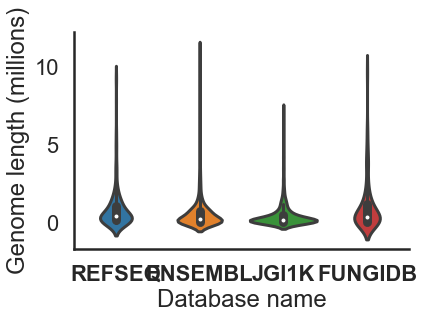

In [38]:
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")

ax = sns.violinplot(y="length", x="db", data=data)
ax.set(ylabel='Genome length (millions)', xlabel='Database name')

ax.ticklabel_format(style='plain', axis='y',useOffset=False)

plt.xticks(fontweight='bold')

g=sns.despine()
# plt.savefig("genome.length.pdf", bbox_inches='tight')

IOError: [Errno 2] No such file or directory: 'supplementary_fig_1/split.chr.contig.length.pdf'

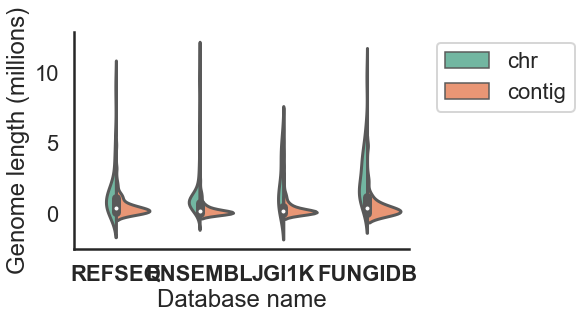

In [39]:
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")

ax = sns.violinplot(y="length", x="db", hue="type", data=data, palette="Set2", split=True)
ax.set(ylabel='Genome length (millions)', xlabel='Database name')

ax.ticklabel_format(style='plain', axis='y',useOffset=False)

plt.xticks(fontweight='bold')
ax.legend(borderaxespad=0.5, loc=2, bbox_to_anchor=(1.05, 1))

g=sns.despine()
# plt.savefig("supplementary_fig_1/split.chr.contig.length.pdf", bbox_inches='tight')


    CHROMSOMES

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ncbi = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'NCBI'", cnx)
onek = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = '1K'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'ENSEMBLE'", cnx)
fungidb = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'FUNGIDB'", cnx)


NCBI_chr = []
ONEK_chr = []
ENSEMBL_chr = []
FUNGIDB_chr = []


#  divided by 1 million to correct y axis to be terms of millions
for index, row in ncbi.iterrows():
    if row["avg_length_chromosomes"] > 0:
        NCBI_chr.append(row["avg_length_chromosomes"] / 1000000.0)

for index, row in onek.iterrows():
    if row["avg_length_chromosomes"] > 0:
        ONEK_chr.append(row["avg_length_chromosomes"] / 1000000.0)

for index, row in ensembl.iterrows():
    if row["avg_length_chromosomes"] > 0:
        ENSEMBL_chr.append(row["avg_length_chromosomes"] / 1000000.0)

for index, row in fungidb.iterrows():
    if row["avg_length_chromosomes"] > 0:
        FUNGIDB_chr.append(row["avg_length_chromosomes"] / 1000000.0)


file=open('chr.length.csv','w')
file.write('db,type,length\n')

for i in NCBI_chr:
    if i!=0:
        file.write('REFSEQ,chr,'+str(i))
        file.write("\n")


for i in ENSEMBL_chr:
    if i!=0:
        file.write('ENSEMBL,chr,'+str(i))
        file.write("\n")
        
for i in ONEK_chr:
    if i!=0:
        file.write('JGI1K,chr,'+str(i))
        file.write("\n")
        
for i in FUNGIDB_chr:
    if i!=0:
        file.write('FUNGIDB,chr,'+str(i))
        file.write("\n")
        
        
file.close()


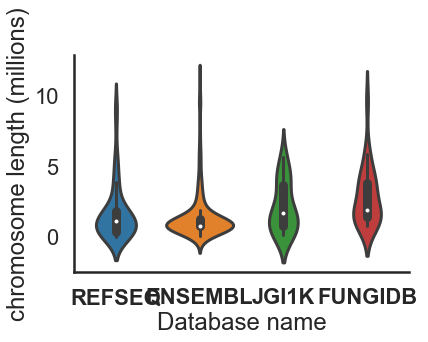

In [42]:
import seaborn as sns
import pandas as pd
chr_data=pd.read_csv('chr.length.csv')


g=sns.set_style("white")
g=sns.set_context("poster")

ax = sns.violinplot(y="length", x="db", data=chr_data)
ax.set(ylabel='chromosome length (millions)', xlabel='Database name')

ax.ticklabel_format(style='plain', axis='y',useOffset=False)

plt.xticks(fontweight='bold')

g=sns.despine()
# plt.savefig("supplementary_fig_1/chr.length.pdf", bbox_inches='tight')


        Only CONTIGS

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ncbi = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'NCBI'", cnx)
onek = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = '1K'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'ENSEMBLE'", cnx)
fungidb = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'FUNGIDB'", cnx)


NCBI_contig = []
ONEK_contig = []
ENSEMBL_contig  = []
FUNGIDB_contig = []

#  divided by 1 million to correct y axis to be terms of millions
for index, row in ncbi.iterrows():
    if row["avg_length_contig"] > 0:
        NCBI_contig.append(row["avg_length_contig"] / 1000000.0)

for index, row in onek.iterrows():
    if row["avg_length_contig"] > 0:
        ONEK_contig.append(row["avg_length_contig"] / 1000000.0)
        
for index, row in ensembl.iterrows():
    if row["avg_length_contig"] > 0:
        ENSEMBL_contig.append(row["avg_length_contig"] / 1000000.0)

for index, row in fungidb.iterrows():
    if row["avg_length_contig"] > 0:
        FUNGIDB_contig.append(row["avg_length_contig"] / 1000000.0)

        

file=open('contig.length.csv','w')
file.write('db,type,length\n')

for i in NCBI_contig:
    if i!=0:
        file.write('REFSEQ,contig,'+str(i))
        file.write("\n")


for i in ENSEMBL_contig:
    if i!=0:
        file.write('ENSEMBL,contig,'+str(i))
        file.write("\n")
        

for i in ONEK_contig:
    if i!=0:
        file.write('JGI1K,contig,'+str(i))
        file.write("\n")
        
for i in FUNGIDB_contig:
    if i!=0:
        file.write('FUNGIDB,contig,'+str(i))
        file.write("\n")
        
file.close()

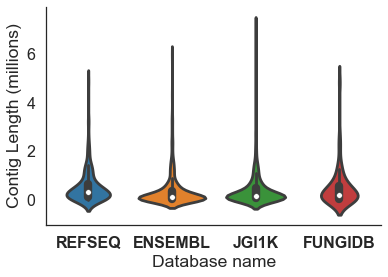

In [17]:
import seaborn as sns
import pandas as pd
contig_data=pd.read_csv('contig.length.csv')

# print(contig_data.head())

g=sns.set_style("white")
g=sns.set_context("poster")

ax = sns.violinplot(y="length", x="db", data=contig_data)
ax.set(ylabel='Contig Length (millions)', xlabel='Database name')

ax.ticklabel_format(style='plain', axis='y',useOffset=False)

plt.xticks(fontweight='bold')

g=sns.despine()
# plt.savefig("supplementary_fig_1/contig.length.pdf", bbox_inches='tight')




In [18]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv

cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')
# Create the connection
largest_max_contig_species = pd.read_sql_query("SELECT GENUSNAME, SPECIESNAME, DBNAME, MAX(max_length_contig) FROM speciesdb", cnx)
print(largest_max_contig_species)
largest_avg_contig_species = pd.read_sql_query("SELECT GENUSNAME, SPECIESNAME, DBNAME, MAX(avg_length_contig) FROM speciesdb", cnx)
print(largest_avg_contig_species)


species_contigs_in_one_chr_in_other = pd.read_sql_query("SELECT SPECIESNAME, DBNAME FROM speciesdb where SPECIEStaxid = 284813", cnx)

print(species_contigs_in_one_chr_in_other)



            GENUSNAME              SPECIESNAME    DBNAME  \
0  Rhizoctonia solani  Rhizoctonia solani AG-3  ENSEMBLE   

   MAX(max_length_contig)  
0                19365423  
                             GENUSNAME                 SPECIESNAME DBNAME  \
0  Fusarium sambucinum species complex  Fusarium pseudograminearum     1K   

   MAX(avg_length_contig)  
0                 7164496  
Empty DataFrame
Columns: [SPECIESNAME, DBNAME]
Index: []


    MITOCHONDRIA

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.war

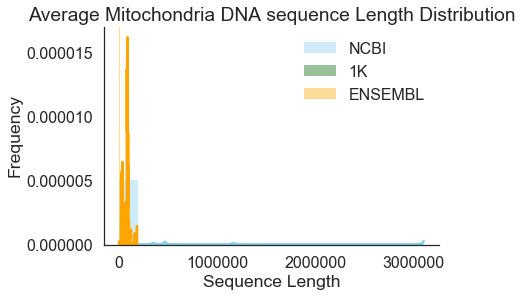

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ncbi = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'NCBI'", cnx)
onek = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = '1K'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'ENSEMBLE'", cnx)


NCBI = []
ONEK = []
ENSEMBL = []

for index, row in ncbi.iterrows():
     NCBI.append(row["avg_length_mtDNA"])

for index, row in onek.iterrows():
     ONEK.append(row["avg_length_mtDNA"])
        
for index, row in ensembl.iterrows():
     ENSEMBL.append(row["avg_length_mtDNA"])
        
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")

sns.distplot( NCBI , color="skyblue", label="NCBI")
sns.distplot( ONEK , color="darkgreen", label="1K")
sns.distplot( ENSEMBL , color="orange", label="ENSEMBL")
plt.legend()
plt.title("Average Mitochondria DNA sequence Length Distribution")

plt.xlabel("Sequence Length")
plt.ylabel("Frequency")


g=sns.despine()
plt.show(g)


    PLASMIDS

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.war

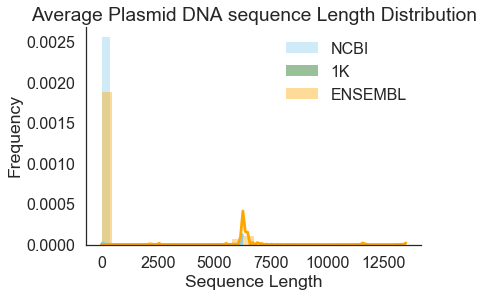

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ncbi = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'NCBI'", cnx)
onek = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = '1K'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'ENSEMBLE'", cnx)


NCBI = []
ONEK = []
ENSEMBL = []

for index, row in ncbi.iterrows():
     NCBI.append(row["avg_length_plasmids"])

for index, row in onek.iterrows():
     ONEK.append(row["avg_length_plasmids"])
        
for index, row in ensembl.iterrows():
     ENSEMBL.append(row["avg_length_plasmids"])
        
        
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")

sns.distplot( NCBI , color="skyblue", label="NCBI")
sns.distplot( ONEK , color="darkgreen", label="1K")
sns.distplot( ENSEMBL , color="orange", label="ENSEMBL")
plt.legend()
plt.title("Average Plasmid DNA sequence Length Distribution")


plt.xlabel("Sequence Length")
plt.ylabel("Frequency")

g=sns.despine()
plt.show(g)


# shared in two: chrom and contig vs chrom chrom vs cont and cont
    # Comare if dna types are the same or different  for species present in two 

In [21]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

occur_twice = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 2", cnx)
# print(occur_twice.size)


ENSEMBLE_NCBI = []
ENSEMBLE_1K = []
NCBI_1K = []

for index, row in occur_twice.iterrows():
    SPECIEStaxid = row["SPECIESTAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE SPECIESTAXID = {SPECIEStaxid}", cnx)
    ENSEMBLE = 0
    NCBI = 0
    ONEK = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBLE = 1
        if r["DBNAME"] == "NCBI":
            NCBI = 1
        if r["DBNAME"] == "1K":
            ONEK = 1
    if ENSEMBLE == 1 and ONEK == 1:  
        ENSEMBLE_1K.append(SPECIEStaxid)
    if ENSEMBLE == 1 and NCBI == 1:  
        ENSEMBLE_NCBI.append(SPECIEStaxid)
    if NCBI == 1 and ONEK == 1: 
        NCBI_1K.append(SPECIEStaxid)    
        
# print(len(ENSEMBLE_1K))
# print(len(ENSEMBLE_NCBI))
# print(len(NCBI_1K))


# COMPARE ENSEMBLE AND 1K

for SPECIEStaxid in ENSEMBLE_1K:
    databases = pd.read_sql_query(f"SELECT SPECIESTAXID, DBNAME, chromosome_count, contig_count, mtdna_count, plasmid_count, avg_length_chromosomes, avg_length_contig FROM SPECIESDB WHERE SPECIESTAXID = {SPECIEStaxid} ", cnx)
    print(databases)
    print("------------")


# # COMPARE ENSEMBLE AND NCBI
for SPECIEStaxid in ENSEMBLE_NCBI:
    databases = pd.read_sql_query(f"SELECT SPECIESTAXID, DBNAME, chromosome_count, contig_count, mtdna_count, plasmid_count FROM SPECIESDB WHERE SPECIESTAXID = {SPECIEStaxid} ", cnx)
    print(databases)
    print("------------")



# # COMPARE NCBI AND 1K
for SPECIEStaxid in NCBI_1K:
    databases = pd.read_sql_query(f"SELECT SPECIESTAXID, DBNAME, chromosome_count, contig_count, mtdna_count, plasmid_count FROM SPECIESDB WHERE SPECIESTAXID = {SPECIEStaxid} ", cnx)
    print(databases)
    print("------------")
    


   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0          4918  ENSEMBLE                 0           197            0   
1          4918        1K                 0           198            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0              65004  
1              0                       0              64892  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0          5007  ENSEMBLE                 0           324            0   
1          5007        1K                 0            84            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0              39775  
1              0                       0             162523  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0          5044  ENSEMBLE                 0           540            1   
1       

   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0         42458  ENSEMBLE                 0           209            0   
1         42458        1K                 0             0            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0             163105  
1              0                       0                  0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0         42742  ENSEMBLE                 0           740            0   
1         42742        1K                 0           740            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0              53539  
1              0                       0              53715  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0         46634  ENSEMBLE                 0           150            0   
1       

   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0         76867  ENSEMBLE                 0           176            0   
1         76867        1K                 0           176            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0             220807  
1              0                       0             221531  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0         78148  ENSEMBLE                 0           100            0   
1         78148        1K                 0           100            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0             471980  
1              0                       0             473527  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0         78410  ENSEMBLE                 0           677            0   
1       

1              0                       0               6632  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        183478  ENSEMBLE                 0           414            0   
1        183478        1K                 0           414            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0              86373  
1              0                       0              86042  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        189963  ENSEMBLE                 0           341            1   
1        189963  ENSEMBLE                 0           193            1   
2        189963        1K                 0           341            0   
3        189963        1K                 0           193            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0              72361  
1       

   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        396024  ENSEMBLE                 0           110            0   
1        396024        1K                 0           110            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0             242228  
1              0                       0             243022  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        416450  ENSEMBLE                 0           700            0   
1        416450        1K                 0           700            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0              45684  
1              0                       0              45577  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        420778  ENSEMBLE                 0           115            0   
1       

   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0       1858805  ENSEMBLE                 0            99            0   
1       1858805        1K                 0            99            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0             302961  
1              0                       0             303955  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0       2501646  ENSEMBLE                 0          2648            0   
1       2501646  ENSEMBLE                 0         23355            0   
2       2501646        1K                 0          1600            0   

   plasmid_count  avg_length_chromosomes  avg_length_contig  
0              0                       0              14182  
1              0                       0               2112  
2              0                       0              30211  
------------
   SPECIESTAXID    D

   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0        796027  ENSEMBLE                 4             0            1   
1        796027      NCBI                 4             0            0   

   plasmid_count  
0              0  
1              0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0       1041607  ENSEMBLE                 0           364            0   
1       1041607      NCBI                 0           364            0   

   plasmid_count  
0              0  
1              0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0       1051613  ENSEMBLE                 0            26            1   
1       1051613      NCBI                 0            26            1   

   plasmid_count  
0              0  
1              0  
------------
   SPECIESTAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0       1071379  ENSEMBLE                10    

# shared in Three:  chrom and contig vs chrom chrom vs cont and cont 
    # Comare if dna types are the same or different for species present in three

In [ ]:
Are the mitochondria present in refseq and ensembl for the same species? Same with complete chromosomes 

In [ ]:
import sqlite3
import pandas as pd
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ncbi = pd.read_sql_query("select SPECIESTAXID from SPECIESDB where dbname = '1K';", cnx)



# .headers on
# .mode csv
# .output onekSPECIESTAXID.csv
# select SPECIESTAXID from SPECIESDB where dbname = '1K';
# .quit

# .headers on
# .mode csv
# .output EnsemblkSPECIESTAXID.csv
# select SPECIESTAXID from SPECIESDB where dbname = 'ENSEMBLE';
# .quit



In [ ]:
# import sqlite3
# import pandas as pd
# import ete3
# from ete3 import NCBITaxa


# cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

# dbquerry = pd.read_sql_query("select GENUSTAXID from SPECIESDB where GENUSTAXID IS NOT NULL;", cnx)

# ncbi_taxa = NCBITaxa()
# for index, row in dbquerry.iterrows():
#     genusID = row["GENUSTAXID"]
#     OGID = genusID
#     name = ncbi_taxa.get_taxid_translator([genusID])
#     rank = ncbi_taxa.get_rank(name)
#     lineage = ncbi_taxa.get_lineage(genusID)
#     nope = ['family', 'order', 'class', 'phylum', 'kingdom'] # These levels are too far
#     while((rank[genusID] == 'species' or rank[genusID] == 'species group' or rank[genusID] == 'no rank')):
#         if ncbi_taxa.get_rank([lineage[-2]])[lineage[-2]] in nope: #if lineage passes genus, stop
#             break
#         genusID = lineage[-2] # -1 is the current taxid -2 is the next one (which we want)
#         lineage = ncbi_taxa.get_lineage(genusID) #update the lineage
#         name = ncbi_taxa.get_taxid_translator([genusID])
#         rank = ncbi_taxa.get_rank(name)
#     print(rank)
#     pd.read_sql_query("UPDATE SPECIESDB SET GENUSTAXID = ? WHERE GENUSTAXID = ?;", cnx, params = [genusID, OGID])
    
    
#     while(rank[genusID] != 'genus'):
#         genusID = lineage[-1]
#         lineage = ncbi_taxa.get_lineage(genusID)
#         name = ncbi_taxa.get_taxid_translator([genusID])
#         rank = ncbi_taxa.get_rank(name)
# #         print("hello")
#     print(rank[genusID])
    
#     pd.read_sql_query("UPDATE SPECIESDB set GENUSTAXID = ?, GENUSNAME = ? WHERE SPECIESTAXID = ?", (genusID, name, OGID), cnx)
        


    
# name4 = ncbi.get_taxid_translator([28581])
# print(name4)
# print(ncbi.get_rank(name4))

# added STRAINTAXID Column
# changed STRAIN column to STRAINNAME 
# added GENUSNAME and GENUSTAXID columns
# changed TAXID column name SPECIESTAXID



# pd.read_sql_query(f"UPDATE SPECIESDB WHERE SPECIESTAXID = {SPECIESTAXID} WITH {newSPECIESTAXID}", cnx)

# This code does the following:
# ensures that species level SPECIESTAXIDs are associated with species, and strain SPECIESTAXID with strain.
# uses ncbi naming scheme to ensure all identical genus, species, and strains have consistent names.


# SPECIESTAXIDs = pd.read_sql_query("select SPECIESTAXID from SPECIESDB", cnx)


# def update_SPECIESTAXID(SPECIESTAXIDs)
#     ncbi_taxa = NCBITaxa()
#     for index, row in SPECIESTAXIDs.iterrows():
#         SPECIESTAXID = row["SPECIESTAXID"]
#         name = ncbi_taxa.get_taxid_translator(SPECIESTAXID)
#         rank = ncbi_taxa.get_rank(name)
#         if rank == 'species':
        
            
# def update_naming(SPECIESTAXIDs)





# print(SPECIESTAXIDs)


# ncbi = NCBITaxa()

# SPECIESTAXIDs =[28583]

# print(ncbi.get_taxid_translator([28583]))        

# name1 = ncbi.get_taxid_translator([28583])

# print(ncbi.get_rank(name1))

# print("   -----   ")

# lineage = ncbi.get_lineage(28583)

# print(lineage)

# print(lineage[-2])

# print(ncbi.get_taxid_translator([28583]))        

# name2 = ncbi.get_taxid_translator([28583])

# print(ncbi.get_rank(name2))




# print("DADSDDASDSDAS")



# print(ncbi.get_taxid_translator([578462]))        

# name1 = ncbi.get_taxid_translator([578462])

# print(name1)

# print(ncbi.get_rank([578462]))

# print("   -----   ")


# print(ncbi.get_lineage(578462))

# # print(ncbi.get_descendant_taxa(28583))

# print(ncbi.get_lineage(28583))
# name3 = ncbi.get_taxid_translator([28583])
# print(name3)
# print(ncbi.get_rank(name3))


# print(ncbi.get_lineage(28581))
# name4 = ncbi.get_taxid_translator([28581])
# print(name4)
# print(ncbi.get_rank(name4))

# Find the proportions of references that are given species, strain, or missing Taxonomic IDs

In [ ]:
# BOILER PLATE ---------------------------------------------------------------------------------------------------------------
import sqlite3
import pandas as pd
import ete3
from ete3 import NCBITaxa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc
import seaborn as sns

# Set up variables and database connections for data processing --------------------------------------------------------------

ncbi_taxa = NCBITaxa()

# Connect to old database with straight taxids
# Using older version because it contains original taxids
db = sqlite3.connect(r'../data/Old_Schema_With_fungi_DB/refSeqFungiStatsWithFUNGIDB_oldSchema.db')

# Get taxids for each of the four databases (ENSEMBL, 1K, NCBI, FUNGIDB)

iso = pd.read_sql_query("SELECT TAXID, DBNAME FROM SPECIESDB", db)

stc_e = 0
stc_1 = 0
stc_n = 0
stc_f = 0

spc_e = 0
spc_1 = 0
spc_n = 0
spc_f = 0

missed = 0
missing = []
missingd = []

# Count SpeciesID and StrainID classifications ---------------------------------------------------------------------------------
for index, row in iso.iterrows():
    tid = row["TAXID"]
    datan = row["DBNAME"]
    rank = ncbi_taxa.get_rank([tid])
    if bool(rank) == False: # If there is no rank given (either because tid is secondary taxid, has been deleted, does not exist in ncbi taxon database)
        missed += 1
        missing += [tid]
        missingd += [datan]
        continue
    if rank[tid] == "species":
        if datan == "ENSEMBLE":
            spc_e += 1
        elif datan == "1K":
            spc_1 += 1
        elif datan == "NCBI":
            spc_n += 1
        elif datan == "FUNGIDB":
            spc_f += 1
            # print(tid)
        else: 
            missed += 1
    else: # everything else assumed to be strain
        if datan == "ENSEMBLE":
            stc_e += 1
        elif datan == "1K":
            stc_1 += 1
        elif datan == "NCBI":
            stc_n += 1
        elif datan == "FUNGIDB":
            stc_f += 1
        else: 
            missed += 1

# organize and print data ---------------------------------------------------------------------------------------------------
            
spec_count = [spc_e, spc_n, spc_1, spc_f]
str_count = [stc_e, stc_n, stc_1, stc_f]


print("SPECIES count [Ensembl, NCBI, JGI, FUNGIDB]: ")
print(spec_count)

print("STRAIN count [Ensembl, NCBI, JGI, FUNGIDB]:")
print(str_count)

print(missed)
print(missing)
print(missingd)

spc_f = 0 # The 11 cases of species taxid were inserted manually, in actuallity no ID was given, so we set to zero
spec_count = [spc_e, spc_n, spc_1, spc_f]

# NUMBERS NEEDED FOR THE GRAPH
    # [ENSEMBLE, NCBI, 1k, FungiDB]
proportion_sp = [(spc_e/811)*100, (spc_n/276)*100, (spc_1/1060)*100, (spc_f/134)*100]
proportion_st = [(stc_e/811)*100, (stc_n/276)*100, (stc_1/1060)*100, (stc_f/134)*100]
proportion_mi = [(1-((spc_e+ stc_e)/811))*100, (1-((spc_n+ stc_n)/276))*100, (1-((spc_1+ stc_1)/1060))*100, (1-((spc_f+ stc_f)/134))*100]

print("[ENSEMBLE, NCBI, 1k, FUNGIDB] percent species")
print("proportion_sp", proportion_sp)
print("[ENSEMBLE, NCBI, 1k, FUNGIDB] percent strain")
print("proportion_st", proportion_st)
print("[ENSEMBLE, NCBI, 1k, FUNGIDB] percent missing")
print("proportion_mi", proportion_mi)


# Set variables used in the graph ---------------------------------------------------------------------------------------------

proportion_sp = np.array(((spc_e/811)*100, (spc_1/1060)*100, (spc_f/134)*100))
proportion_st = np.array(((stc_e/811)*100, (stc_1/1060)*100, (stc_f/134)*100))
proportion_mi = np.array(((1-((spc_e+ stc_e)/811))*100, (1-((spc_1+ stc_1)/1060))*100, (1-((spc_f+ stc_f)/134))*100))

print("\n\n\nWHAT IS ACTUALLY ON GRAPH:")
print("[ENSEMBLE, 1k, FUNGIDB] percent species")
print("proportion_sp", proportion_sp)
print("[ENSEMBLE, 1k, FUNGIDB] percent strain")
print("proportion_st", proportion_st)
print("[ENSEMBLE, 1k, FUNGIDB] percent missing")
print("proportion_mi", proportion_mi)


# The position of the bars on the x-axis
r = [0,2,4]
 
# Names of group and bar width
names = ['ENSMEBL', 'JGI1K', "FUNGIDB"]
barWidth = 1
 
# CREATE THE GRAPH-----------------------------------------------------------------------------------------------------------

g=sns.set_style("white")
g=sns.set_context("poster")

# Create orange bars default bar on bottom for species taxids
p1 = plt.bar(r, proportion_sp, color='steelblue', edgecolor='w', width=barWidth)
# Create green bars (middle), on top of species for strain
p2 = plt.bar(r, proportion_st, bottom=proportion_sp, color='silver', edgecolor='w', width=barWidth)
# Create blue bars (top), on top of all for missing taxids
p3 = plt.bar(r, proportion_mi, bottom=proportion_st+proportion_sp, color='darkviolet', edgecolor='w', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Database name")

# Custom Y axis
plt.ylabel("Proportion of Organisms")

#  legend
plt.legend((p1[0], p2[0], p3[0]), ('Organisms given Species ID', 'Organisms given Strain ID', 'Organisms not given ID'),bbox_to_anchor=(0.95, -0.35),frameon=False)


# Save the graph ------------------------------------------------------------------------------------------------------------------

g=sns.despine()
# plt.savefig("ID_proportions.png", bbox_inches='tight')

plt.show();

db.close()

# BLAST 

## chromosome to chromosomes 

### species

In [126]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv


cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

# select where Species occurs in four databases. Even if strain is present, use in generating a consensus for species.
occur_quad = pd.read_sql_query("SELECT SPECIESTAXID FROM SPECIESDB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 4", cnx)

# print(occur_quad)


blast_test_case_filepaths = pd.read_sql_query("SELECT SPECIESTAXID, FILEPATH FROM SPECIESDB WHERE SPECIESTAXID = 4837", cnx)
# print(blast_test_case_filepaths)

for index, row in blast_test_case_filepaths.iterrows():
    filepaths += row["FILEPATH"]
    
    
print(filepaths)




# BLAST:
# https://www.ncbi.nlm.nih.gov/books/NBK279680/

# Make blast database add 1 instance of species for comparison:

# ./makeblastdb -in FungiDB-41_FgraminearumPH-1_Genome.fasta -dbtype nucl  -parse_seqids -out test

# run blast on different file that is the same species:
# ./blastn -db test -query GCF_000240135.3_ASM24013v3_genomic.fna -out results.out -outfmt "7 qseqid sseqid pident qlen length mismatch" 



# Find all sequence identifications
# grep '>' Fusarium_graminearum_gca_000599445.CS3005v1.dna.toplevel.fa -A 10


/u/home/a/akarlsbe/scratch/fungi/FUNGIDB/FungiDB-41_PblakesleeanusNRRL1555_Genome.fasta
/u/home/a/akarlsbe/scratch/fungi/ENSEMBLE/Phycomyces_blakesleeanus_nrrl_1555_.Phybl2.dna.toplevel.fa
/u/home/a/akarlsbe/scratch/fungi/NCBI/GCF_001638985.1_Phybl2_genomic.fna
/u/home/a/akarlsbe/scratch/fungi/1K/Phycomyces_blakesleeanus_v2_masked_scaffolds.fasta
/u/home/a/akarlsbe/scratch/fungi/FUNGIDB/FungiDB-41_PblakesleeanusNRRL1555_Genome.fasta
/u/home/a/akarlsbe/scratch/fungi/ENSEMBLE/Phycomyces_blakesleeanus_nrrl_1555_.Phybl2.dna.toplevel.fa
/u/home/a/akarlsbe/scratch/fungi/NCBI/GCF_001638985.1_Phybl2_genomic.fna
/u/home/a/akarlsbe/scratch/fungi/1K/Phycomyces_blakesleeanus_v2_masked_scaffolds.fasta
/u/home/a/akarlsbe/scratch/fungi/FUNGIDB/FungiDB-41_PblakesleeanusNRRL1555_Genome.fasta
/u/home/a/akarlsbe/scratch/fungi/ENSEMBLE/Phycomyces_blakesleeanus_nrrl_1555_.Phybl2.dna.toplevel.fa
/u/home/a/akarlsbe/scratch/fungi/NCBI/GCF_001638985.1_Phybl2_genomic.fna
/u/home/a/akarlsbe/scratch/fungi/1K/Phyc

### Strains